In [1]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=df1b64949d1da8899cbd03effb9d152f8df7cc83957f428d0ac80c33c8b7aa22
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [2]:
#Paso 1: Importación de todas las librerias a usar en el trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
from langdetect import detect
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [3]:
#Paso 2: Obtener el contenido de las reviews
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36"
}
def obtener_reviews(url):
  reviews = []

  for page in range(0, 15):
      page_url = f"{url}?page={page}"
      response = requests.get(page_url, headers=headers)
      html_content = response.text

      soup = BeautifulSoup(html_content, "html.parser")
      review_elements = soup.find_all("div", class_="review_body")

      for review in review_elements:
          text = review.text.strip()
          reviews.append(text)

      return reviews


In [4]:
#Paso 3: Llevar todas las reviews a un csv
url_re4 = 'https://www.metacritic.com/game/playstation-5/resident-evil-4/user-reviews'
url_re2 = 'https://www.metacritic.com/game/playstation-4/resident-evil-2/user-reviews'
url_re6 = 'https://www.metacritic.com/game/pc/resident-evil-6/user-reviews'
url_sh2 = 'https://www.metacritic.com/game/playstation-2/silent-hill-2/user-reviews'

reviews_re4 = pd.DataFrame(obtener_reviews(url_re4), columns=["Review"])
reviews_re2 = pd.DataFrame(obtener_reviews(url_re2), columns=["Review"])
reviews_re6 = pd.DataFrame(obtener_reviews(url_re6), columns=["Review"])
reviews_sh2 = pd.DataFrame(obtener_reviews(url_sh2), columns=["Review"])

reviews_re4.to_csv("reviews_re4.csv", index=False)
reviews_re2.to_csv("reviews_re2.csv", index=False)
reviews_re6.to_csv("reviews_re6.csv", index=False)
reviews_sh2.to_csv("reviews_sh2.csv", index=False)

In [5]:
reviews_sh2

,Review
0,"In my opinion, this is game of the year, all y..."
1,Gameplay has never been SH's strongpoint.The c...
2,One of the scariest psychological thrillers of...
3,Silent hill has always had aging mechanics and...
4,"Silent Hill 2. Wow, what can I say? Much bette..."
...,...
98,"Одна из лучших игр, превосходное, шикарное и у..."
99,"Este juego simplemente es una obra maestra, me..."
100,While Silent Hill 2 retains the same basic for...
101,"Quite simply, mature PS2 owners craving a cree..."


In [6]:
#Paso 4: Eliminar todos los comentarios que no esten en ingles
# Función para detectar el idioma de un texto
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

# Aplicar la función de detección de idioma a cada registro
reviews_re4['language'] = reviews_re4['Review'].apply(detect_language)
reviews_re6['language'] = reviews_re6['Review'].apply(detect_language)
reviews_re2['language'] = reviews_re2['Review'].apply(detect_language)
reviews_sh2['language'] = reviews_sh2['Review'].apply(detect_language)

# Filtrar los registros que no están en inglés
reviews_re4 = reviews_re4[reviews_re4['language'] == 'en']
reviews_re6 = reviews_re6[reviews_re6['language'] == 'en']
reviews_re2 = reviews_re2[reviews_re2['language'] == 'en']
reviews_sh2 = reviews_sh2[reviews_sh2['language'] == 'en']

# Eliminar la columna 'language' si no es necesaria
reviews_re4 = reviews_re4.drop('language', axis=1)
reviews_re6 = reviews_re6.drop('language', axis=1)
reviews_re2 = reviews_re2.drop('language', axis=1)
reviews_sh2 = reviews_sh2.drop('language', axis=1)


In [7]:
reviews_re4

,Review
1,Here's a daily reminder for everyone- This is ...
2,Extraordinarily good game and best Resident Ev...
3,This is my favorite gaming experience since 20...
4,"Best game of all time, visuals are amazing, me..."
5,"As everyone already knows, over 90% of actual ..."
...,...
97,"Absolutely Loved this game, stayed so true to ..."
99,The Resident Evil 4 Remake attempts to re-bala...
100,Another box ticked on the list. After recent r...
101,"Like I said at the start, I can’t tell you how..."


In [8]:
#Paso adicional para reindexar el df
reviews_re4 = reviews_re4.reset_index(drop=True)
reviews_re6 = reviews_re6.reset_index(drop=True)
reviews_re2 = reviews_re2.reset_index(drop=True)
reviews_sh2 = reviews_sh2.reset_index(drop=True)

In [9]:
#Paso 5: Limpiar el texto de caracteres especiales, links y todo lo que no sirva
#definir una funcion para limpiar el texto
def cleanTxt(text):
  patron = r"[^\w\s]"
  text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
  text = re.sub('#', '', text) # Removing '#' hash tag
  text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
  text = re.sub(patron, " ", text)
  return text


#Limpiar las reviews
reviews_re4['Review'] = reviews_re4['Review'].apply(cleanTxt)
reviews_re6['Review'] = reviews_re6['Review'].apply(cleanTxt)
reviews_re2['Review'] = reviews_re2['Review'].apply(cleanTxt)
reviews_sh2['Review'] = reviews_sh2['Review'].apply(cleanTxt)

In [10]:
#Paso 6: Tokenization, POS tagging
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

reviews_re4['POS tagged'] = reviews_re4['Review'].apply(token_stop_pos)
reviews_re6['POS tagged'] = reviews_re6['Review'].apply(token_stop_pos)
reviews_re2['POS tagged'] = reviews_re2['Review'].apply(token_stop_pos)
reviews_sh2['POS tagged'] = reviews_sh2['Review'].apply(token_stop_pos)

#Paso 7: Lematización?
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

reviews_re4['Lemma'] = reviews_re4['POS tagged'].apply(lemmatize)
reviews_re6['Lemma'] = reviews_re6['POS tagged'].apply(lemmatize)
reviews_re2['Lemma'] = reviews_re2['POS tagged'].apply(lemmatize)
reviews_sh2['Lemma'] = reviews_sh2['POS tagged'].apply(lemmatize)
reviews_sh2.head()

,Review,POS tagged,Lemma
0,In my opinion this is game of the year all y...,"[(opinion, n), (game, n), (year, n), (years, n...",opinion game year year game game deep almost...
1,Gameplay has never been SH s strongpoint The c...,"[(Gameplay, n), (never, r), (SH, n), (strongpo...",Gameplay never SH strongpoint combat dodgy m...
2,One of the scariest psychological thrillers of...,"[(One, None), (scariest, a), (psychological, a...",One scary psychological thriller time game m...
3,Silent hill has always had aging mechanics and...,"[(Silent, n), (hill, n), (always, r), (aging, ...",Silent hill always age mechanic obscure down...
4,Silent Hill 2 Wow what can I say Much bette...,"[(Silent, n), (Hill, n), (2, None), (Wow, n), ...",Silent Hill 2 Wow say Much good first addict...


In [11]:
#Paso 8: Asignar la subjetitividad a cada reseña
# crear la funcion para obtener la subjectividad
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Crear la funcion para obtener la polaridad
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Crear dos nuevas columnas 'Subjectividad' & 'Polaridad'
reviews_re4['Subjetividad'] = reviews_re4['Lemma'].apply(getSubjectivity)
reviews_re4['Polaridad'] = reviews_re4['Lemma'].apply(getPolarity)

reviews_re6['Subjetividad'] = reviews_re6['Lemma'].apply(getSubjectivity)
reviews_re6['Polaridad'] = reviews_re6['Lemma'].apply(getPolarity)

reviews_re2['Subjetividad'] = reviews_re2['Lemma'].apply(getSubjectivity)
reviews_re2['Polaridad'] = reviews_re2['Lemma'].apply(getPolarity)

reviews_sh2['Subjetividad'] = reviews_sh2['Lemma'].apply(getSubjectivity)
reviews_sh2['Polaridad'] = reviews_sh2['Lemma'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
reviews_sh2

,Review,POS tagged,Lemma,Subjetividad,Polaridad
0,In my opinion this is game of the year all y...,"[(opinion, n), (game, n), (year, n), (years, n...",opinion game year year game game deep almost...,0.446667,-0.121944
1,Gameplay has never been SH s strongpoint The c...,"[(Gameplay, n), (never, r), (SH, n), (strongpo...",Gameplay never SH strongpoint combat dodgy m...,0.514943,0.084483
2,One of the scariest psychological thrillers of...,"[(One, None), (scariest, a), (psychological, a...",One scary psychological thriller time game m...,0.500000,-0.300000
3,Silent hill has always had aging mechanics and...,"[(Silent, n), (hill, n), (always, r), (aging, ...",Silent hill always age mechanic obscure down...,0.376557,0.115522
4,Silent Hill 2 Wow what can I say Much bette...,"[(Silent, n), (Hill, n), (2, None), (Wow, n), ...",Silent Hill 2 Wow say Much good first addict...,0.546154,-0.136538
...,...,...,...,...,...
85,AMAZING What an incredible experience I love...,"[(AMAZING, n), (incredible, a), (experience, n...",AMAZING incredible experience love game Amaz...,0.670000,0.250000
86,Best SH game and one of the best in this genre...,"[(Best, n), (SH, n), (game, n), (one, None), (...",Best SH game one best genre overall intrigui...,0.540972,0.255556
87,While Silent Hill 2 retains the same basic for...,"[(Silent, n), (Hill, n), (2, None), (retains, ...",Silent Hill 2 retain basic format original s...,0.415000,0.175000
88,Quite simply mature PS2 owners craving a cree...,"[(Quite, r), (simply, r), (mature, a), (PS2, n...",Quite simply mature PS2 owner crave creepy g...,0.593750,0.027083


In [12]:
#En una búsqueda, se pudo notar que el langdetector identifica "Evil" y "Horror" como una palabra negativa.
#Entonces se busca eliminar esta palabra para evitar sesgos

reviews_re4['Lemma'] = reviews_re4['Lemma'].str.lower().apply(lambda x: x.replace('evil', ''))
reviews_re4['Lemma'] = reviews_re4['Lemma'].str.lower().apply(lambda x: x.replace('horror', ''))

reviews_re2['Lemma'] = reviews_re2['Lemma'].str.lower().apply(lambda x: x.replace('evil', ''))
reviews_re2['Lemma'] = reviews_re2['Lemma'].str.lower().apply(lambda x: x.replace('horror', ''))

reviews_re6['Lemma'] = reviews_re6['Lemma'].str.lower().apply(lambda x: x.replace('evil', ''))
reviews_re6['Lemma'] = reviews_re6['Lemma'].str.lower().apply(lambda x: x.replace('horror', ''))

reviews_sh2['Lemma'] = reviews_sh2['Lemma'].str.lower().apply(lambda x: x.replace('evil', ''))
reviews_sh2['Lemma'] = reviews_sh2['Lemma'].str.lower().apply(lambda x: x.replace('horror', ''))


In [13]:
#Paso 9: Reasignar la subjetitividad a cada reseña
# crear la funcion para obtener la subjectividad
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Crear la funcion para obtener la polaridad
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Crear dos nuevas columnas 'Subjectividad' & 'Polaridad'
reviews_re4['Subjetividad'] = reviews_re4['Lemma'].apply(getSubjectivity)
reviews_re4['Polaridad'] = reviews_re4['Lemma'].apply(getPolarity)

reviews_re6['Subjetividad'] = reviews_re6['Lemma'].apply(getSubjectivity)
reviews_re6['Polaridad'] = reviews_re6['Lemma'].apply(getPolarity)

reviews_re2['Subjetividad'] = reviews_re2['Lemma'].apply(getSubjectivity)
reviews_re2['Polaridad'] = reviews_re2['Lemma'].apply(getPolarity)

reviews_sh2['Subjetividad'] = reviews_sh2['Lemma'].apply(getSubjectivity)
reviews_sh2['Polaridad'] = reviews_sh2['Lemma'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
reviews_sh2

,Review,POS tagged,Lemma,Subjetividad,Polaridad
0,In my opinion this is game of the year all y...,"[(opinion, n), (game, n), (year, n), (years, n...",opinion game year year game game deep almost...,0.446667,-0.121944
1,Gameplay has never been SH s strongpoint The c...,"[(Gameplay, n), (never, r), (SH, n), (strongpo...",gameplay never sh strongpoint combat dodgy m...,0.514943,0.084483
2,One of the scariest psychological thrillers of...,"[(One, None), (scariest, a), (psychological, a...",one scary psychological thriller time game m...,0.500000,-0.300000
3,Silent hill has always had aging mechanics and...,"[(Silent, n), (hill, n), (always, r), (aging, ...",silent hill always age mechanic obscure down...,0.376557,0.115522
4,Silent Hill 2 Wow what can I say Much bette...,"[(Silent, n), (Hill, n), (2, None), (Wow, n), ...",silent hill 2 wow say much good first addict...,0.546154,-0.136538
...,...,...,...,...,...
85,AMAZING What an incredible experience I love...,"[(AMAZING, n), (incredible, a), (experience, n...",amazing incredible experience love game amaz...,0.670000,0.250000
86,Best SH game and one of the best in this genre...,"[(Best, n), (SH, n), (game, n), (one, None), (...",best sh game one best genre overall intrigui...,0.540972,0.255556
87,While Silent Hill 2 retains the same basic for...,"[(Silent, n), (Hill, n), (2, None), (retains, ...",silent hill 2 retain basic format original s...,0.415000,0.175000
88,Quite simply mature PS2 owners craving a cree...,"[(Quite, r), (simply, r), (mature, a), (PS2, n...",quite simply mature ps2 owner crave creepy g...,0.593750,0.027083


In [14]:
#Paso 9: Crear gráficos y pruebas para ver los resultados obtenidos
# Crear una funcion para calcular negativo (-1), neutral (0) and positivo (+1)
def getAnalysis(score):
  if score < 0:
    return 'Negativo'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positivo'

reviews_re4['Analisis'] = reviews_re4['Polaridad'].apply(getAnalysis)
reviews_re2['Analisis'] = reviews_re2['Polaridad'].apply(getAnalysis)
reviews_re6['Analisis'] = reviews_re6['Polaridad'].apply(getAnalysis)
reviews_sh2['Analisis'] = reviews_sh2['Polaridad'].apply(getAnalysis)

In [15]:
reviews_sh2

,Review,POS tagged,Lemma,Subjetividad,Polaridad,Analisis
0,In my opinion this is game of the year all y...,"[(opinion, n), (game, n), (year, n), (years, n...",opinion game year year game game deep almost...,0.446667,-0.121944,Negativo
1,Gameplay has never been SH s strongpoint The c...,"[(Gameplay, n), (never, r), (SH, n), (strongpo...",gameplay never sh strongpoint combat dodgy m...,0.514943,0.084483,Positivo
2,One of the scariest psychological thrillers of...,"[(One, None), (scariest, a), (psychological, a...",one scary psychological thriller time game m...,0.500000,-0.300000,Negativo
3,Silent hill has always had aging mechanics and...,"[(Silent, n), (hill, n), (always, r), (aging, ...",silent hill always age mechanic obscure down...,0.376557,0.115522,Positivo
4,Silent Hill 2 Wow what can I say Much bette...,"[(Silent, n), (Hill, n), (2, None), (Wow, n), ...",silent hill 2 wow say much good first addict...,0.546154,-0.136538,Negativo
...,...,...,...,...,...,...
85,AMAZING What an incredible experience I love...,"[(AMAZING, n), (incredible, a), (experience, n...",amazing incredible experience love game amaz...,0.670000,0.250000,Positivo
86,Best SH game and one of the best in this genre...,"[(Best, n), (SH, n), (game, n), (one, None), (...",best sh game one best genre overall intrigui...,0.540972,0.255556,Positivo
87,While Silent Hill 2 retains the same basic for...,"[(Silent, n), (Hill, n), (2, None), (retains, ...",silent hill 2 retain basic format original s...,0.415000,0.175000,Positivo
88,Quite simply mature PS2 owners craving a cree...,"[(Quite, r), (simply, r), (mature, a), (PS2, n...",quite simply mature ps2 owner crave creepy g...,0.593750,0.027083,Positivo


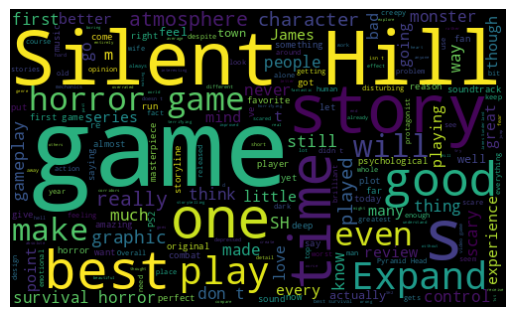

In [16]:
# Segunda prueba de gráficos con las palabras quitadas
allWords = ' '.join([rvs for rvs in reviews_sh2['Review']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


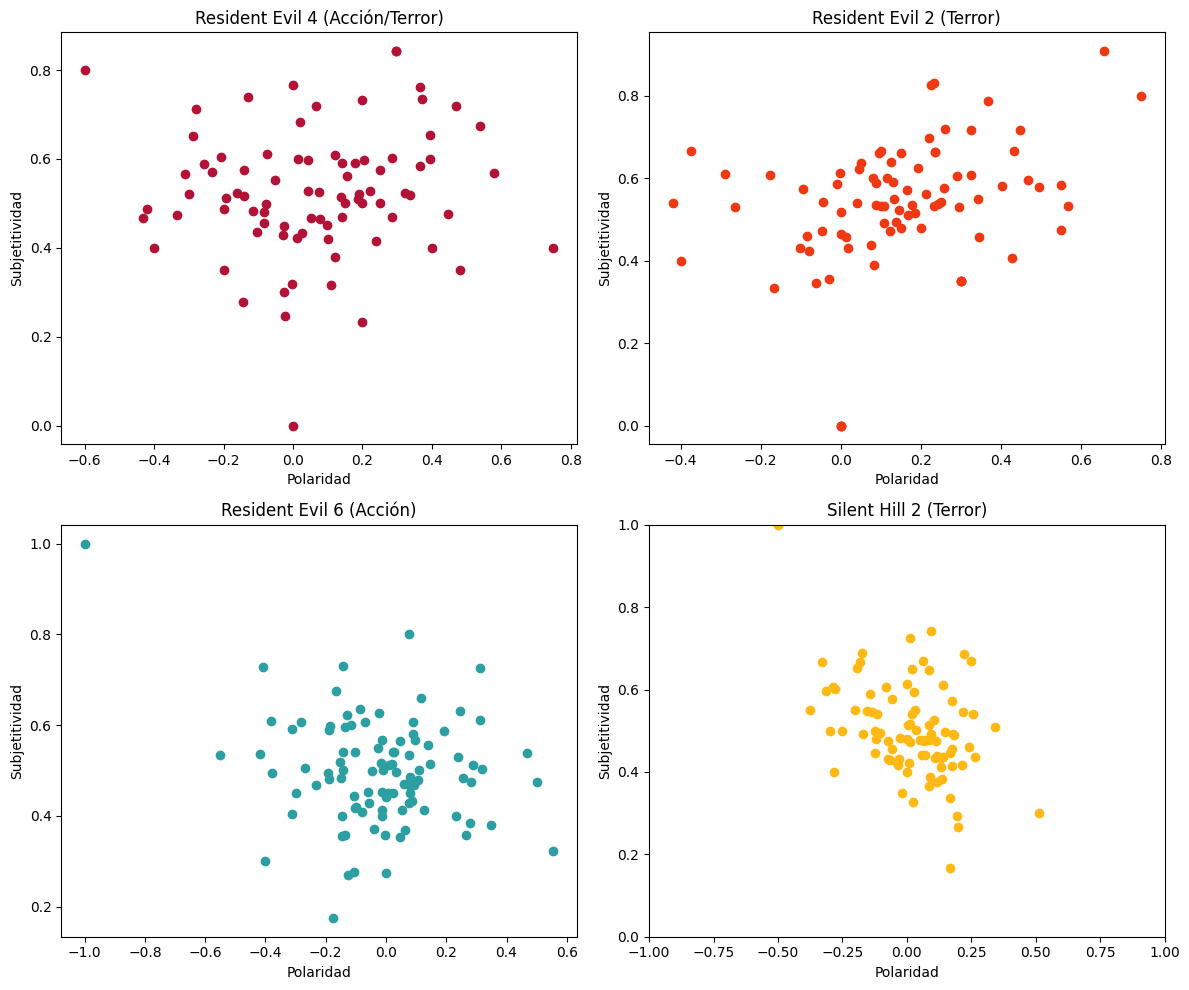

In [17]:
import matplotlib.pyplot as plt

# Crear una figura con 2 filas y 2 columnas para los 4 gráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Gráfico 1
axes[0, 0].scatter(reviews_re4["Polaridad"], reviews_re4["Subjetividad"], color='#b31237')
axes[0, 0].set_title('Resident Evil 4 (Acción/Terror)')
axes[0, 0].set_xlabel('Polaridad')
axes[0, 0].set_ylabel('Subjetitividad')

# Gráfico 2
axes[0, 1].scatter(reviews_re2["Polaridad"], reviews_re2["Subjetividad"], color='#f03813')
axes[0, 1].set_title('Resident Evil 2 (Terror)')
axes[0, 1].set_xlabel('Polaridad')
axes[0, 1].set_ylabel('Subjetitividad')

# Gráfico 3
axes[1, 0].scatter(reviews_re6["Polaridad"], reviews_re6["Subjetividad"], color='#2c9fa3')
axes[1, 0].set_title('Resident Evil 6 (Acción)')
axes[1, 0].set_xlabel('Polaridad')
axes[1, 0].set_ylabel('Subjetitividad')

# Gráfico 4
axes[1, 1].scatter(reviews_sh2["Polaridad"], reviews_sh2["Subjetividad"], color='#ffb914')
axes[1, 1].set_title('Silent Hill 2 (Terror)')
axes[1, 1].set_xlabel('Polaridad')
axes[1, 1].set_ylabel('Subjetitividad')

plt.xlim(-1, 1)
plt.ylim(0, 1)

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

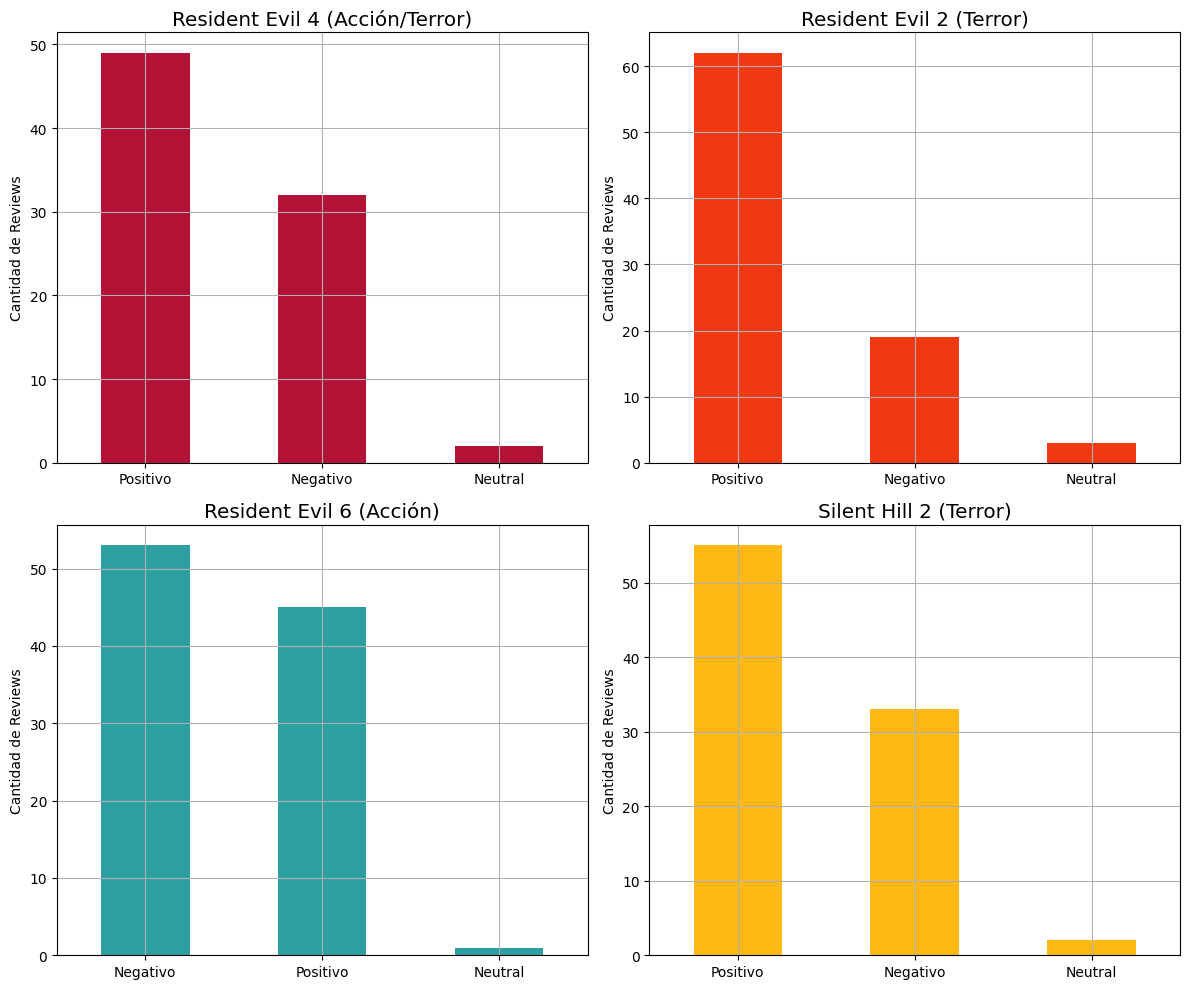

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
plt.style.use('bmh')

# Gráfico 1
axes[0, 0].set_title('Resident Evil 4 (Acción/Terror)')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Cantidad de Reviews')
reviews_re4['Analisis'].value_counts().plot(kind='bar', ax=axes[0, 0], color='#b31237')

# Rotar las etiquetas del eje x en el gráfico 1
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

# Gráfico 2
axes[0, 1].set_title('Resident Evil 2 (Terror)')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Cantidad de Reviews')
reviews_re2['Analisis'].value_counts().plot(kind='bar', ax=axes[0, 1], color='#f03813')

# Rotar las etiquetas del eje x en el gráfico 2
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

# Gráfico 3
axes[1, 0].set_title('Resident Evil 6 (Acción)')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Cantidad de Reviews')
reviews_re6['Analisis'].value_counts().plot(kind='bar', ax=axes[1, 0], color='#2c9fa3')

# Rotar las etiquetas del eje x en el gráfico 3
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

# Gráfico 4
axes[1, 1].set_title('Silent Hill 2 (Terror)')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Cantidad de Reviews')
reviews_sh2['Analisis'].value_counts().plot(kind='bar', ax=axes[1, 1], color='#ffb914')

# Rotar las etiquetas del eje x en el gráfico 4
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

# Ajustar los subplots para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Conclusiones:

● ¿Cuál es la tendencia general de sentimiento en los comentarios de los videojuegos?
El sentimiento es bastante mixto, lo cual es curioso porque 3 de los 4 juegos son considerados buenos y aclamados por la critica, entonces, lo que pasa es que al ser juegos de terror y acción las librerías de lenguaje natural no detectan cuando una palabra 'negativa' en realidad se refiere a una característica positiva de un juego de terror, como podrían ser miedo, terror, sangre, muerte y por el estilo.

● ¿Existen diferencias en el sentimiento entre géneros de películas o directores específicos?
En cuanto a los videojuegos, los sentimientos no varían mucho según el género o el director, mas que nada lo que afecta al sesgo en un videojuego es la calidad de este mismo y que no se le haya hecho review bombing

